# Exercise 7 | Principle Component Analysis and K-Means Clustering

In [1]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

import numpy as np
from numpy import linalg

from scipy.io import loadmat

from sklearn import(cluster, decomposition, preprocessing)

## Part 1: Load Example Dataset

We start this exercise by using a small dataset that is easily to
visualize.

In [2]:
mat = loadmat('ex7data1.mat')
X = mat['X']

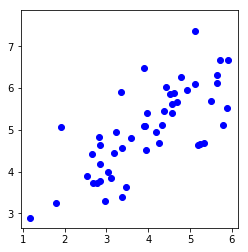

In [3]:
# visualize the example dataset
plt.plot(X[:, 0], X[:, 1], 'bo');
plt.axis([0.5, 6.5, 2, 8]);
plt.axis('square');

## Part 2: Principal Component Analysis

You should now implement PCA, a dimension reduction technique.

In [4]:
# Normalize feature.
scaler = preprocessing.StandardScaler().fit(X)
X_norm = scaler.transform(X)

# Compute PCA.
pca = decomposition.PCA().fit(X_norm)
U, S = pca.components_.T, pca.explained_variance_
mu = scaler.mean_

Top eigenvector:
U[:, 1] = [-0.70710678 -0.70710678]
(you should expect to see -0.707107 -0.707107, approximate)



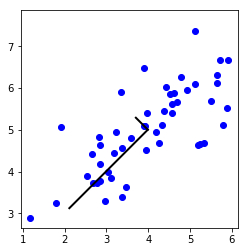

In [5]:
plt.plot(X[:, 0], X[:, 1], 'bo');
plt.axis([0.5, 6.5, 2, 8]); plt.axis('square');

# compute the Y-coordinates.
Y0 = mu + 1.5 * S[0] * U[:, 0]
Y1 = mu + 1.5 * S[1] * U[:, 1]
plt.plot([mu[0], Y0[0]], [mu[1], Y0[1]], '-k', linewidth=2);
plt.plot([mu[0], Y1[0]], [mu[1], Y1[1]], '-k', linewidth=2);

print(f'''Top eigenvector:
U[:, 1] = {U[:, 0]}
(you should expect to see -0.707107 -0.707107, approximate)
''')

## Part 3: Dimension Reduction

You should now implement the projection step to map the data onto the
first k eigenvectors. The code will then plot the data in this reduced
dimensional space. This will show you what the data looks like when
using only the corresponding eigenvectors to reconstruct it.

In [6]:
def project_data(X, U, K):
    '''Project X onto the first K dimension.'''

    m, _ = X.shape
    U_reduced = U[:, :K]
    Z = X.dot(U_reduced)

    return Z

def recover_data(Z, U, K):
    X_recovered = np.zeros((np.size(Z, 0), np.size(U, 1)))
    U_reduced = U[:, 0:K]
    for i in range(np.size(Z, 0)):
        X_recovered[i, :] = (U_reduced * Z[i, :].T).flat

    return X_recovered

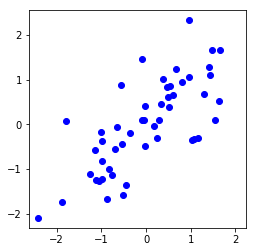

In [7]:
# Plot the normalized dataset (returned from pca)

plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo');
plt.axis([-4, 3, -4, 3]); plt.axis('square');

In [8]:
# Project the data onto K = 1 dimension
K = 1
Z = project_data(X_norm, U, K)

print(f'''Projection of the first example: {Z[0][0]}
(this value should be about 1.481274)''');

Projection of the first example: 1.4963126084578515
(this value should be about 1.481274)


In [9]:
X_recovered = recover_data(Z, U, K)
print(f'''Approximation of the first example: {X_recovered[0, 0]} {X_recovered[0, 1]}
(this value should be about -1.047419 -1.047419)''');

Approximation of the first example: -1.0580527922154783 -1.0580527922154779
(this value should be about -1.047419 -1.047419)


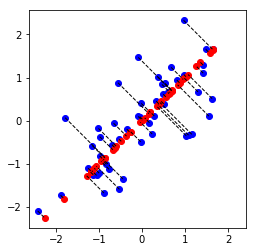

In [10]:
# Draw lines connecting the projected points to the original points

plt.plot(X_norm[:, 0], X_norm[:, 1], 'bo');
plt.plot(X_recovered[:, 0], X_recovered[:, 1], 'ro');
plt.axis([-4, 30, -4, 30]); plt.axis('square');
for i in range(np.size(X_norm, 0)):
    _ = np.vstack((X_norm[i, :], X_recovered[i, :])).T
    plt.plot(_[0], _[1] , '--k', linewidth=1)

# Part 4: Loading and Visualizing Face Data

We start the exercise by first loading and visualizing the
dataset. The following code will load the dataset into your
environment.

In [11]:
def display_data(X, ax = plt):
    padding = 1
    m, n = X.shape
    width = np.int(np.round(np.sqrt(n)))
    display_width = np.int(np.sqrt(m))
    display_height = display_width
    canvas_width = (width + padding) * display_width
    canvas_height = canvas_width
    faces = np.zeros((canvas_width, canvas_height))
    # i for row index; j for column index; f for face index
    i, j, f = 0, 0, 0
    while i < canvas_height:
        while j < canvas_width:
            face = X[f, :].reshape((width, width)).T
            faces[i + padding : i + padding + width, j + padding : j + padding + width] = face
            f += 1
            j += padding + width
        j = 0
        i += padding + width

    ax.imshow(faces, cmap='gray')

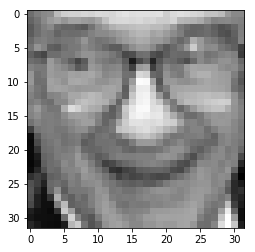

In [12]:
mat = loadmat('ex7faces.mat')
X = mat['X']
width = np.int(np.sqrt(X.shape[1]))

plt.imshow(X[0, :].reshape((width, width)).T, cmap='gray');

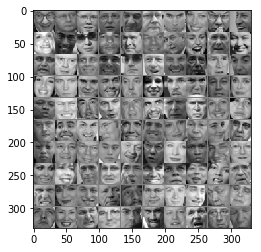

In [13]:
# Display the first 100 faces, 10 faces in each rows.

display_data(X[:100, :]);

# Part 5: PCA on Face Data: Eigenfaces

Run PCA and visualize the eigenvectors which are in this case
eigenfaces.  We display the first 36 eigenfaces.

In [14]:
def feature_normalize(X):
    mu = np.mean(X, axis=0)
    X_norm = X - mu
    sigma = np.std(X_norm, axis=0)
    X_norm = X_norm / sigma
    
    return X_norm, mu, sigma

def pca(X):
    m, _ = X.shape
    sigma = X.T.dot(X) / m

    return linalg.svd(sigma, compute_uv=True)

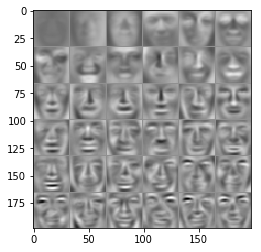

In [15]:
X_norm, mu, sigma = feature_normalize(X)
U, S, V = pca(X_norm)

display_data(U[:, :36].T)

# 6: Dimension Reduction for Faces

Project images to the eigen space using the top k eigenvectors. If you
are applying a machine learning algorithm.

In [16]:
# Dimension reduction for face dataset.

K = 100
Z = project_data(X_norm, U, K)

print(f'''The projected data Z has a size of: 
{Z.shape}''')

The projected data Z has a size of: 
(5000, 100)


# Part 7: Visualization of Faces after PCA Dimension Reduction

Project images to the eigen space using the top K eigen vectors and
visualize only using those K dimensions. Compare to the original
input, which is also displayed.

In [17]:
def recover_data(Z, U, K):
    U_reduced = U[:, :K]

    return U_reduced.dot(Z.T).T

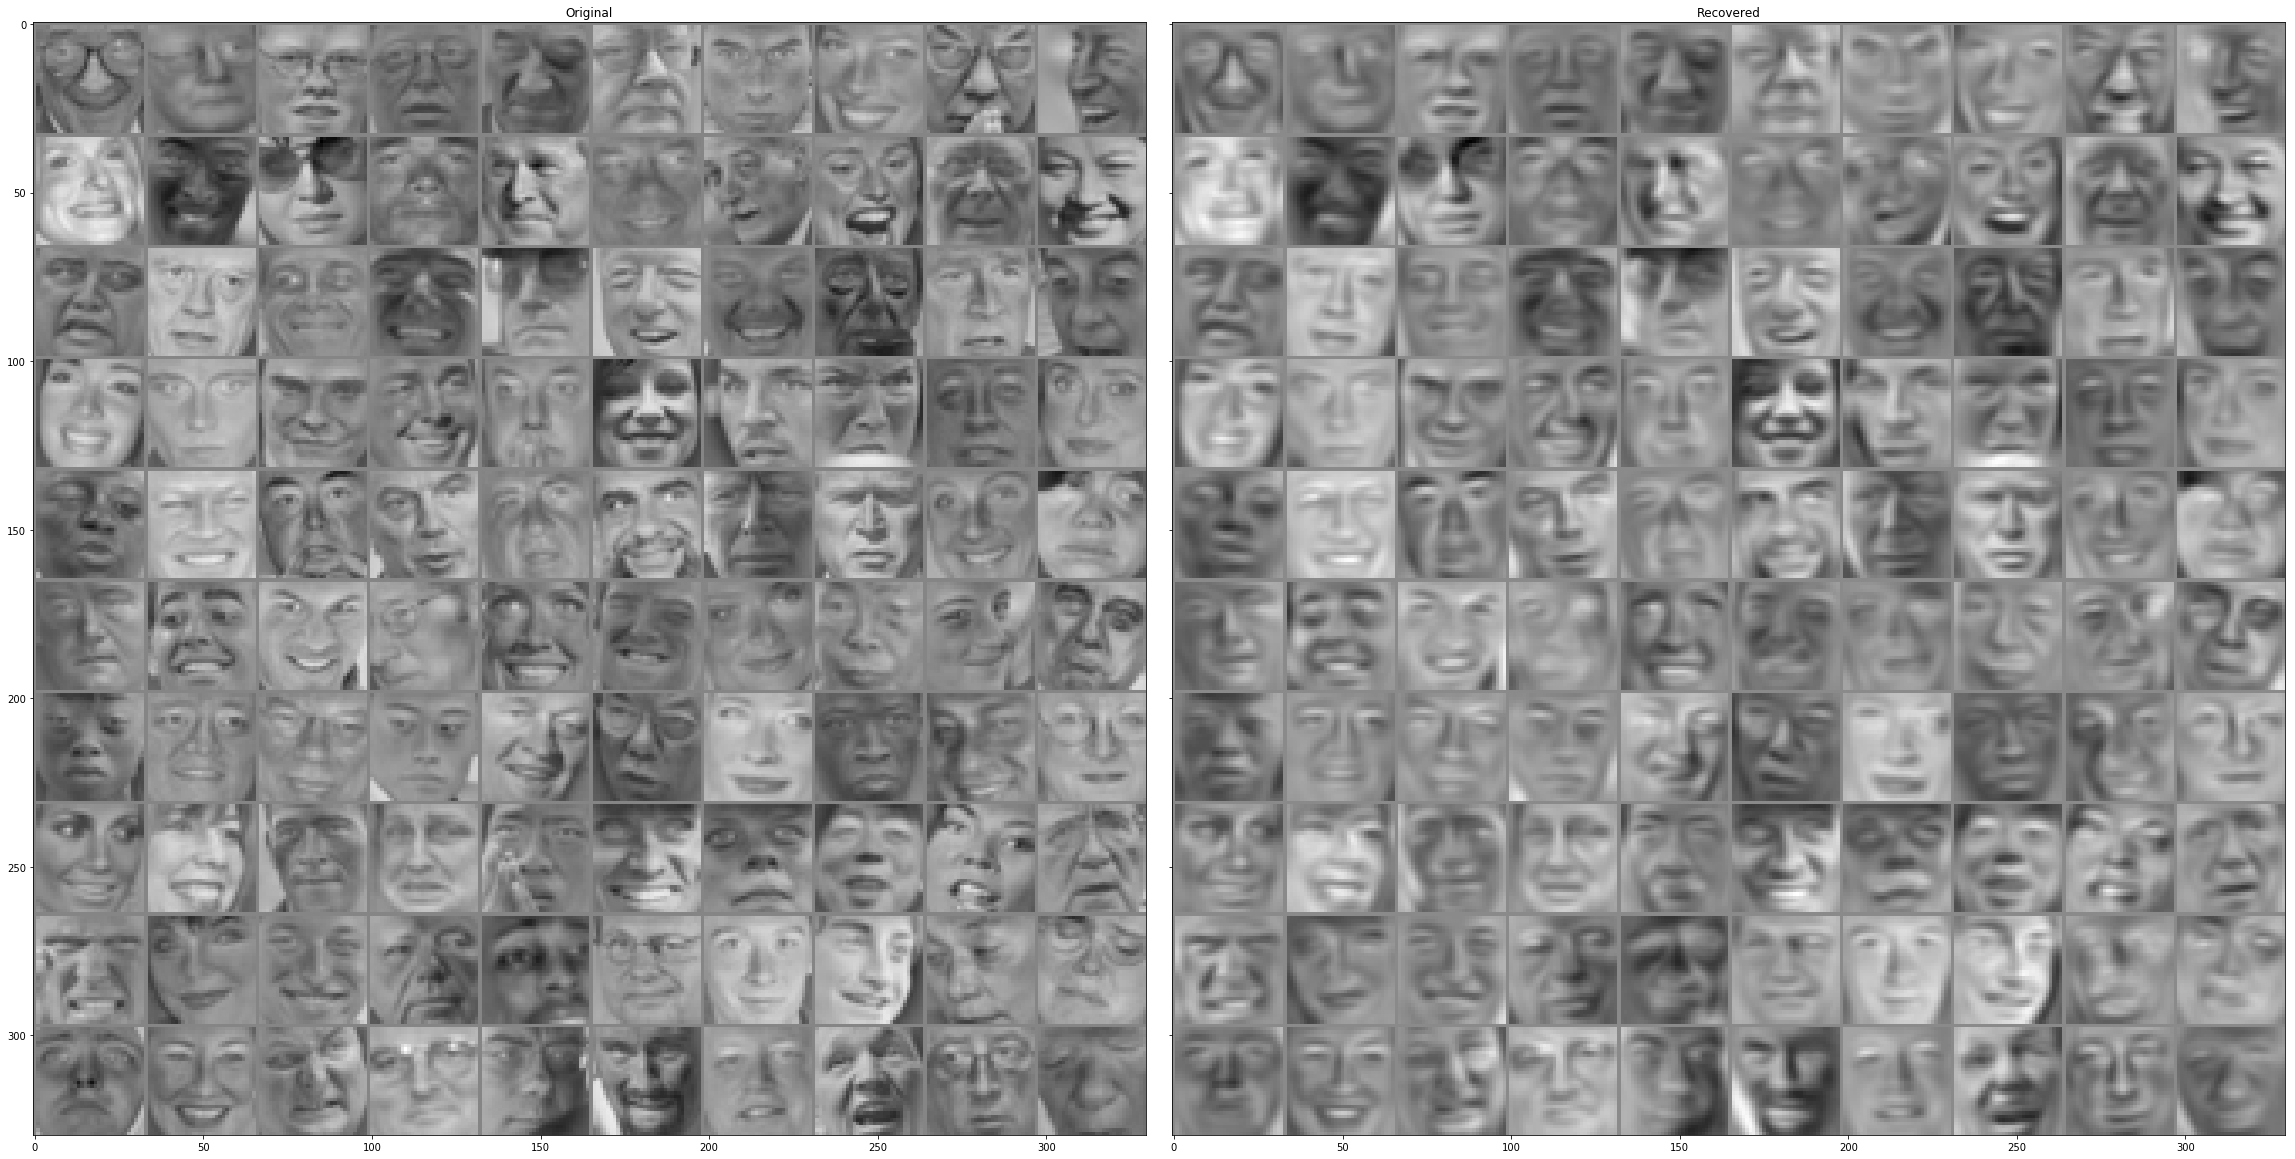

In [18]:
K = 100
X_rec = recover_data(Z, U, K)

# Display normalized data

fig, (ax0, ax1) = plt.subplots(1, 2, sharey=True)
ax0.set_title('Original')
ax1.set_title('Recovered')
fig.set_figwidth(32)
fig.set_figheight(32)
fig.tight_layout()

display_data(X_norm[:100, :], ax0)
display_data(X_rec[:100, :], ax1)

# Part 8(a): Optional (ungraded) Exercise: PCA for Visualization

One useful application of PCA is to use it to visualize
high-dimensional data. In the last K-Means exercise you ran K-Means on
3-dimensional pixel colors of an image. We first visualize this output
in 3D, and then apply PCA to obtain a visualization in 2D.

In [19]:
def create_hsv_palette(K):
    '''Create a HSV palette using the first K colors.'''
    first = np.arange(K, dtype=np.float32).reshape((K, 1)) / K
    rest = np.ones((K, 2))
    hsv_palette = np.hstack((first, rest))

    return colors.hsv_to_rgb(hsv_palette)

In [20]:
# Load the image and convert it to an array.

A = np.double(mpimg.imread('bird_small.png'))
A /= 255
X = A.reshape((A.shape[0] * A.shape[1], 3))

K = 16 # color palette size
hsv_palette = create_hsv_palette(K)

In [21]:
# Cluster the array using the k-means algorithm

kmeans = cluster.KMeans(n_clusters= 16, max_iter = 10)
idx = kmeans.fit_predict(X)

In [22]:
# Randomly select 1000 points

sel = np.random.permutation(1000)
X_sel = X[sel]

# Then map their colors according to their clusters and convert the color to HEX format.
X_colors = [colors.rgb2hex(c) for c in hsv_palette[idx[sel]]]

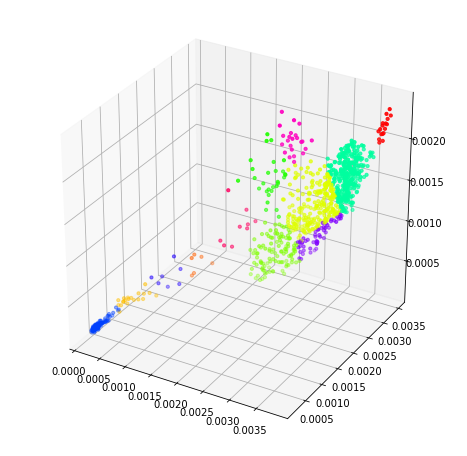

In [23]:
# Visualize the data and centroid memberships in 3D

plt.figure(figsize=(8, 8));
ax = plt.subplot(1, 1, 1, projection='3d')
#ax.view_init(45, -45)
ax.scatter3D(X_sel[:, 0], X_sel[:, 1], X_sel[:, 2], s=10, c=X_colors);

# Part 8(b): Optional (ungraded) Exercise: PCA for Visualization

Use PCA to project this cloud to 2D for visualization.

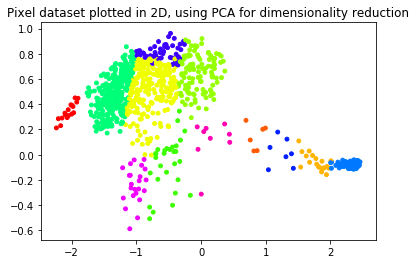

In [24]:
X_norm, mu, sigma = feature_normalize(X)
U, S, _ = pca(X_norm)
Z = project_data(X_norm, U, 2)

# Plot data points
K = 16
palette = create_hsv_palette(K + 1)
colors_K = palette[idx[sel], :]

plt.scatter(Z[sel, 0], Z[sel, 1], 15, c=colors_K);
plt.title('Pixel dataset plotted in 2D, using PCA for dimensionality reduction');